<a href="https://colab.research.google.com/github/a-jinkya18/cats-vs-Dogs-Classification/blob/main/Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 23.1MB/s]
100% 1.06G/1.06G [00:52<00:00, 22.0MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize

def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label


train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model


model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#add batch Normaliztion
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#add batch Normaliztion
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
#add batch Normaliztion
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))





In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2753 - accuracy: 0.8809 - val_loss: 0.4669 - val_accuracy: 0.8278
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2130 - accuracy: 0.9147 - val_loss: 0.5742 - val_accuracy: 0.7500
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1379 - accuracy: 0.9478 - val_loss: 0.6599 - val_accuracy: 0.8138
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1062 - accuracy: 0.9606 - val_loss: 0.6045 - val_accuracy: 0.7910
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0772 - accuracy: 0.9717 - val_loss: 0.6810 - val_accuracy: 0.8280
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0646 - accuracy: 0.9778 - val_loss: 0.8096 - val_accuracy: 0.8212
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0570 - accuracy: 0.9804 - val_loss: 0.7033 - val_ac

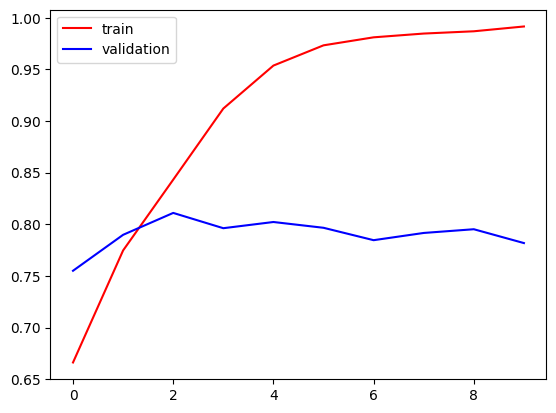

In [ ]:
#plot the graph to understand training and validation accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
#ways to reduce overfitting

#1) Add more data
#2) Data Augmentation
#3) L1/L2 Regulization
#4) Dropout layer
#5) Batch Normalization
#6) Reduce Complexity


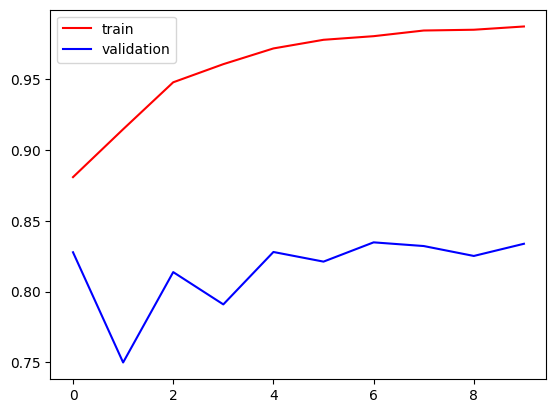

In [ ]:
# Again plot the graph after reducing overfitting using BatchNormalization and Dropout to understand training and validation accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


**Check prediction of model with actual images**

In [ ]:
import cv2

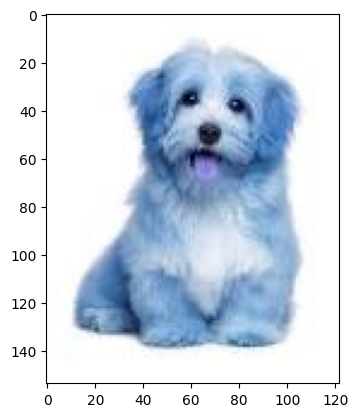

In [ ]:
test_img =cv2.imread('/content/dog_img.jpg')
plt.imshow(test_img)

In [ ]:
#check the shape of image
test_img.shape

(154, 122, 3)

In [ ]:
#resize the image into 256,256 format

test_img=cv2.resize(test_img,(256,256))

In [ ]:

#As we passes the data to model in batches so convert this image into one batch


test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

# here 0 for cats
#      1 for dogs

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

In [ ]:
import cv2

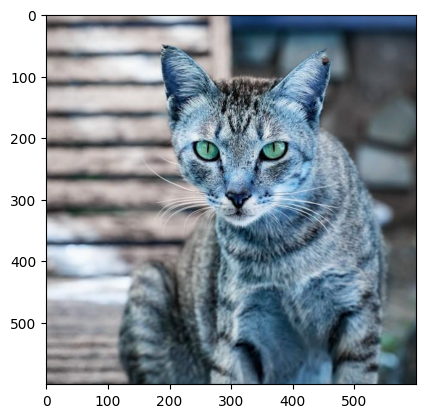

In [ ]:
#now check for another image


test_img2 =cv2.imread('/content/cat_img2.jpg')
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(600, 600, 3)

In [ ]:
test_img2=cv2.resize(test_img2,(256,256))

In [ ]:

test_input2=test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

# here 0 for cats
#      1 for dogs

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)